<a href="https://colab.research.google.com/github/sophiaBuss0410/lab/blob/main/read_dfrome_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考：https://qiita.com/kikuchiTakuya/items/53990fca06fb9ba1d8a7


https://note.nkmk.me/python-dict-keys-values-items/

In [1]:
import json

In [155]:
file = "id909"

json_open = open(file + '.json', 'r', encoding="utf-8")
json_load = json.load(json_open)

print(json_load)

{'url': '', 'tree_id': 909, 'u': 'https://www.dfrome.com/select?id=909', 'memo': '理工系進学女性を増やす\n森原ブリッジ', 'refs': '', 'bookmark': False, 'username': 'soph', 'name': 'Women Scientist/Engineer #minority #phasex', 'data': {'arrows': {'hasReason': [], 'hasEffect': [], 'hasArtifactsOnly': [{'refs': '', 'url': '', 'd2': {'width': 270, 'listId': 1, 'stageX': 1455.999986770391, 'stageY': 489.9994682359754}, 'memo': '', 'i2': 3, 'd1': {'width': 102, 'listId': 1, 'stageX': 1638.9999806988315, 'stageY': 744.0004873461471}, 'visible': True, 'id': 1, 'i1': 5}, {'refs': '', 'url': '', 'd2': {'width': 348, 'listId': 1, 'stageX': 1147.0000366210913, 'stageY': 437.9992953344661}, 'memo': '', 'i2': 11, 'd1': {'width': 270, 'listId': 1, 'stageX': 1455.999986770391, 'stageY': 489.9994682359754}, 'visible': True, 'id': 2, 'i1': 3}, {'refs': '', 'url': '', 'd2': {'width': 272, 'listId': 1, 'stageX': 1448, 'stageY': 247.999495606143}, 'memo': '', 'i2': 10, 'd1': {'width': 224, 'listId': 1, 'stageX': 1290.99999

In [156]:
d = json_load
d.keys()

dict_keys(['url', 'tree_id', 'u', 'memo', 'refs', 'bookmark', 'username', 'name', 'data'])

## テキスト取り出し

In [157]:
import pandas as pd
import numpy as np

In [213]:
#現在の最大表示列数の出力
pd.get_option("display.max_columns")

#最大表示列数の指定（ここでは50列を指定）
pd.set_option('display.max_columns', 20)

In [245]:
print(pd.options.display.width)

pd.options.display.width = 80

print(pd.options.display.width)

160
80


In [247]:
print(pd.options.display.max_colwidth)

pd.options.display.max_colwidth = 100

50


In [248]:
# ノード情報

nodes = d["data"]["items"]["artifacts"]
nodes[1]

{'width': 270,
 'fT': 'the number of women in science and engineering',
 'url': '',
 'pos': {'x': 491.99998677039093, 'y': 436.9994682359754},
 'memo': '',
 'refs': '',
 'sT': 'Increase',
 'visible': True,
 'id': 3}

In [249]:
len(nodes)

27

In [250]:
# テキストすべて

sent = [nodes[i]['fT'] + " " +nodes[i]['sT'] for i in range(len(nodes))]
sent

['Being a science and engineering woman become normal',
 'the number of women in science and engineering Increase',
 'Science and engineering women become major',
 'NPO organization be established',
 'The Society become diverse',
 'science and engineering women Proud to be a science and engineering woman',
 'the number of role models for women in science and technology increase',
 'Science and engineering women can live as themselves',
 'Aspiring people gather friends',
 'events for middle and high school girls organized',
 'JST Invites Applications for Programs for Female Junior High and High School Students',
 'A society embraces diversity',
 'A society in which everyone can thrive can be realized',
 'Unconscious bias prevails',
 'The need to raise funds on our own emerge',
 'Science and engineering women remain minor',
 'Women are said not suited for science.',
 'Parents and teachers promote liberal arts to female middle and high school students.',
 'the number of women in science a

In [251]:
# .txtファイルに保存

with open('%s.txt' %file, 'w') as f:
    for line in sent:
        f.write(line)
        f.write('\n')

In [252]:
lst = [[nodes[i]['id'], nodes[i]['fT'], nodes[i]['sT'], nodes[i]['pos']['x'], nodes[i]['pos']['y']] for i in range(len(nodes))]
lst[:2]
df = pd.DataFrame(lst, columns =['id', 'fT', 'sT', 'x', 'y']) 
print(df.head())
print(df.describe())

   id                                              fT              sT  \
0   2           Being a science and engineering woman   become normal   
1   3  the number of women in science and engineering        Increase   
2   4                   Science and engineering women    become major   
3   5                                NPO organization  be established   
4   9                                     The Society  become diverse   

            x           y  
0  327.000000  310.999631  
1  491.999987  436.999468  
2  630.000004  321.999160  
3  674.999981  691.000487  
4  471.000000   22.000000  
              id            x           y
count  27.000000    27.000000   27.000000
mean   19.962963   821.222223  500.963169
std    10.814810   423.323871  270.014491
min     2.000000   183.000037   22.000000
25%    11.500000   487.999993  288.499832
50%    20.000000   692.000000  534.000678
75%    29.500000  1296.499992  726.000125
max    36.000000  1626.000000  936.001755


## transformerによるネガポジ判定


In [253]:
# pip install -q transformers

In [254]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [279]:
df['sentence'] = df['fT'] + ' ' + df['sT']
a = pd.DataFrame(sentiment_pipeline(sent))
df_all = pd.concat([df, a], axis=1)
df_all.head()

,id,fT,sT,x,y,sentence,label,score
0,2,Being a science and engineering woman,become normal,327.000000,310.999631,Being a science and engineering woman become normal,POSITIVE,0.994304
1,3,the number of women in science and engineering,Increase,491.999987,436.999468,the number of women in science and engineering Increase,POSITIVE,0.999377
2,4,Science and engineering women,become major,630.000004,321.999160,Science and engineering women become major,POSITIVE,0.997028
3,5,NPO organization,be established,674.999981,691.000487,NPO organization be established,POSITIVE,0.506204
4,9,The Society,become diverse,471.000000,22.000000,The Society become diverse,POSITIVE,0.997895


In [280]:
df_all[df_all['x'] > 900].iloc[:, -3:]

,sentence,label,score
13,Unconscious bias prevails,NEGATIVE,0.961618
15,Science and engineering women remain minor,NEGATIVE,0.960711
16,Women are said not suited for science.,NEGATIVE,0.999353
17,Parents and teachers promote liberal arts to female middle and high school students.,POSITIVE,0.998614
18,the number of women in science and engineering remain to be low,NEGATIVE,0.999538
19,Young girls internalize the stereotype,NEGATIVE,0.935954
21,Young girls get knowledge about wrong stereotypes,NEGATIVE,0.801296
23,Science be associated with men,POSITIVE,0.982755
24,Women be assiciated with care and domestic work,POSITIVE,0.984208


In [257]:
df_all['sqrt'] = np.sqrt(df_all['score'])

In [258]:
df_all.loc[df_all['label'] == 'NEGATIVE', 'score'] = (-1)*df_all['score']

In [259]:
df_all.loc[df_all['label'] == 'NEGATIVE', 'sqrt'] = (-1)*df_all['sqrt']

In [277]:
df_all.head()

,id,fT,sT,x,y,sentence,neg,neu,pos,compound
0,2,Being a science and engineering woman,become normal,327.000000,310.999631,Being a science and engineering woman become normal,0.0,1.00,0.00,0.0000
1,3,the number of women in science and engineering,Increase,491.999987,436.999468,the number of women in science and engineering Increase,0.0,0.66,0.34,0.3818
2,4,Science and engineering women,become major,630.000004,321.999160,Science and engineering women become major,0.0,1.00,0.00,0.0000
3,5,NPO organization,be established,674.999981,691.000487,NPO organization be established,0.0,1.00,0.00,0.0000
4,9,The Society,become diverse,471.000000,22.000000,The Society become diverse,0.0,1.00,0.00,0.0000


In [261]:
score = df_all['score']

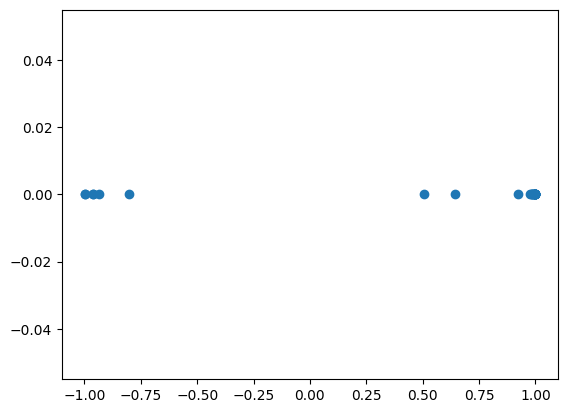

In [262]:
import matplotlib.pyplot as plt
y = [0 for i in range(len(df_all))]
plt.scatter(score, y)
plt.show()

In [263]:
score_sq =df_all['sqrt']
# score_sq

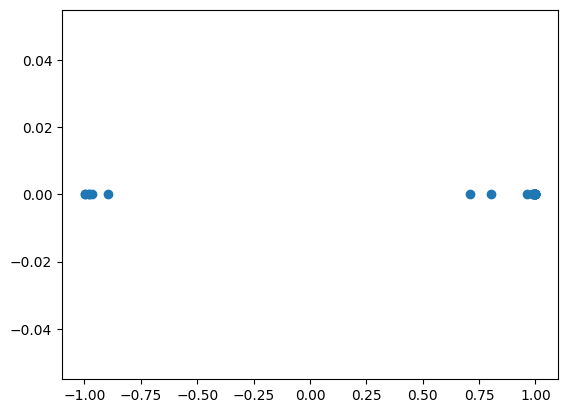

In [264]:
import matplotlib.pyplot as plt
y = [0 for i in range(len(df_all))]
plt.scatter(score_sq, y)
plt.show()

## Text Blobによるネガポジ判定
https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/

In [265]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\so030\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [266]:
# sample

from textblob import TextBlob

text_1 = "The movie was so awesome."
text_2 = "The food here tastes terrible."

#Determining the Polarity 
p_1 = TextBlob(text_1).sentiment.polarity
p_2 = TextBlob(text_2).sentiment.polarity

#Determining the Subjectivity
s_1 = TextBlob(text_1).sentiment.subjectivity
s_2 = TextBlob(text_2).sentiment.subjectivity

print("Polarity of Text 1 is", p_1)
print("Polarity of Text 2 is", p_2)
print("Subjectivity of Text 1 is", s_1)
print("Subjectivity of Text 2 is", s_2)

Polarity of Text 1 is 1.0
Polarity of Text 2 is -1.0
Subjectivity of Text 1 is 1.0
Subjectivity of Text 2 is 1.0


In [267]:
polarity = []
subj = []

for i in range(len(sent)):
    polarity.append(TextBlob(sent[i]).sentiment.polarity)
    subj.append(TextBlob(sent[i]).sentiment.subjectivity)

In [268]:
df['sentence'] = df['fT'] + ' ' + df['sT']
a = pd.DataFrame({'polarity': polarity, 'subjectivity': subj})
df_all = pd.concat([df, a], axis=1)
df_all.head()

,id,fT,sT,x,y,sentence,polarity,subjectivity
0,2,Being a science and engineering woman,become normal,327.000000,310.999631,Being a science and engineering woman become normal,0.1500,0.65
1,3,the number of women in science and engineering,Increase,491.999987,436.999468,the number of women in science and engineering Increase,0.0000,0.00
2,4,Science and engineering women,become major,630.000004,321.999160,Science and engineering women become major,0.0625,0.50
3,5,NPO organization,be established,674.999981,691.000487,NPO organization be established,0.0000,0.00
4,9,The Society,become diverse,471.000000,22.000000,The Society become diverse,0.0000,0.00


In [269]:
df_all.iloc[:, -3:]

,sentence,polarity,subjectivity
0,Being a science and engineering woman become normal,0.150000,0.650000
1,the number of women in science and engineering Increase,0.000000,0.000000
2,Science and engineering women become major,0.062500,0.500000
3,NPO organization be established,0.000000,0.000000
4,The Society become diverse,0.000000,0.000000
5,science and engineering women Proud to be a science and engineering woman,0.800000,1.000000
6,the number of role models for women in science and technology increase,0.000000,0.000000
7,Science and engineering women can live as themselves,0.136364,0.500000
8,Aspiring people gather friends,0.000000,0.000000
9,events for middle and high school girls organized,0.080000,0.270000


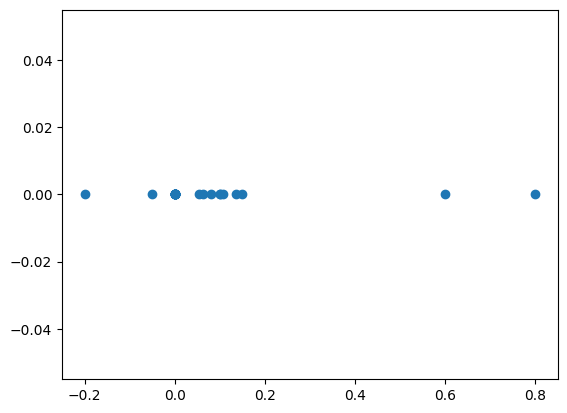

In [270]:
plt.scatter(polarity, y)

## VADERによるネガポジ判定

In [271]:
%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\so030\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [272]:
# sample

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()
text_1 = "The book was a perfect balance between wrtiting style and plot."
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
print("Sentiment of text 1:", sent_1)
print("Sentiment of text 2:", sent_2)

Sentiment of text 1: {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5719}
Sentiment of text 2: {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}


In [273]:
vader = []

for i in range(len(sent)):
    vader.append(sentiment.polarity_scores(sent[i]))

vad = pd.DataFrame(vader)
vad.head()

,neg,neu,pos,compound
0,0.0,1.00,0.00,0.0000
1,0.0,0.66,0.34,0.3818
2,0.0,1.00,0.00,0.0000
3,0.0,1.00,0.00,0.0000
4,0.0,1.00,0.00,0.0000


In [274]:
df['sentence'] = df['fT'] + ' ' + df['sT']
df_all = pd.concat([df, vad], axis=1)
df_all.iloc[:, -5:]

,sentence,neg,neu,pos,compound
0,Being a science and engineering woman become normal,0.000,1.000,0.000,0.0000
1,the number of women in science and engineering Increase,0.000,0.660,0.340,0.3818
2,Science and engineering women become major,0.000,1.000,0.000,0.0000
3,NPO organization be established,0.000,1.000,0.000,0.0000
4,The Society become diverse,0.000,1.000,0.000,0.0000
5,science and engineering women Proud to be a science and engineering woman,0.000,0.780,0.220,0.4767
6,the number of role models for women in science and technology increase,0.000,0.735,0.265,0.3818
7,Science and engineering women can live as themselves,0.000,1.000,0.000,0.0000
8,Aspiring people gather friends,0.000,0.492,0.508,0.4767
9,events for middle and high school girls organized,0.000,1.000,0.000,0.0000


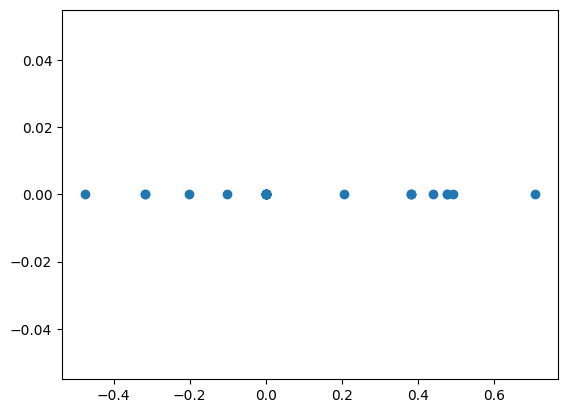

In [275]:
p = vad['compound'].to_list()
plt.scatter(p, y)